<a id = "top"></a>
# Dimensionality Reduction
#### Data projection and visualization
-----
_Author: Eduard Valera Zorita_

### Assignment Contents
- [Introduction](#Introduction)
- [1. Basics of dimensionality reduction](#part1)
- [2. Effect of drug treatments on human cells](#part2)

#### EXPECTED TIME: 4 HRS

### Question reference
- [Question 1](#q1)
- [Question 2](#q2)
- [Question 3](#q3)
- [Question 4](#q4)
- [Question 5](#q5)
- [Question 6.1](#q6.1)
- [Question 6.2](#q6.2)
- [Question 7.1](#q7.1)
- [Question 7.2](#q7.2)
- [Question 7.3](#q7.3)
- [Question 7.4](#q7.4)
- [Question 8.1](#q8.1)
- [Question 8.2](#q8.2)
- [Question 8.3](#q8.3)
- [Question 8.4](#q8.4)
- [Question 9](#q9)
- [Question 10](#q10)
- [Question 11](#q11)
- [Question 12](#q12)
- [Question 13](#q13)
- [Question 14](#q14)
- [Question 15](#q15)
- [Question 16](#q16)
- [Question 17](#q17)
- [Question 18](#q18)

## Introduction
### Overview

This assignment introduces different methods to reduce the dimensionality of the feature space.

Representation of data in low dimension is an essential procedure in data visualization. In practice, it may also increase the performance of our classification/clustering algorithms by two means: 
- Reduction of the computational complexity
- Noise removal by dropping uninformative features

The first part of the assignment reviews the basics of dimensionality reduction: component projections and the analysis of covariance. The objective of the second part is to perform a visualization analysis of human gene expression under different drug treatments. For the latter, you are expected to develop a complete analysis under guidance: removal of uninformative features, data normalization, supervised/unsupervised dimensionality reduction and data visualization.

### Data
This assignment includes two different datasets. The review part utilizes an artificially-generated dataset that reproduces different challenging situations in dimensionality reduction. For the practical case, a real dataset containing gene expression measurements is provided.

____
<a id="part1"></a>
## Part 1. Basics of dimensionality reduction

#### Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Dataset
Let's begin by loading a dataset with artificial samples:

In [2]:
# Load the contents of 'data_features.txt'.
# The dataset is returned as a numpy array and assigned to data_1.
data = np.loadtxt('data/data_features.txt', delimiter='\t', comments='#')

print(data.shape)

(10000, 3)


---
[Back to top](#top)
<a id = "q1"></a>

### Question 1
*How many samples and features does the dataset have?*

In [3]:
### GRADED 
### Assign, as integers, the number of samples to 'num_samples' and the number of features to 'num_features'.

### YOUR ANSWER BELOW

num_samples = 10000
num_features = 3

###
### YOUR CODE HERE
###


In [4]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### 1.1. Vector projections

#### A visual approach
Vector projections are **linear transformations** that consist of the orthogonal projection of a vector onto a direction defined by a line (axis).

Consider the following scatter plot of a dataset consisting of 15 samples and 2 features. Scatter plots are a joint representation of the values of two features. Each sample is represented by a point in the 2-D space:

![Scatterplot](images/points_scatter.png)

To illustrate a vector projection, let's project all the dots to the horizontal axis `axis_1`. To find the projection of a point to an axis, one just needs to draw a perpendicular line to the axis that contains the point. The projection corresponds to the position where the axis and the prerpendicular line intersect:

![Projection](images/projection_scatter.png)

Another projection of the same data on a tilted axis `axis_2`:

![TiltProjection](images/tilt_projection_scatter.png)

#### Computing projections
The resulting projections on the target axis can be calculated with a simple matrix multiplication. Assume that the matrix $X$ is the dataset, where the rows and columns are its samples and features, respectively. The projection of $X$ onto an axis with direction $v$ can be computed as:

$$
X_v = X\cdot v
$$

where $\cdot$ represents a matrix product and $v$ is a column vector of norm 1 pointing to the direction of the axis. In our previous example `axis_1` is characterizd by the direction vector $v_1 =(1,0)$ and `axis_2` has a direction vector $v_2 = \frac{(2,1)}{\sqrt{5}}$.

*Note that the obtained values $X_v$ are the positions relative to the new axis, not to the original space.*

#### Multiple joint projections
When a dataset is projected to a single axis, it is reduced to a single dimension. In the previous examples, once the two features were projected (either to `axis_1` or `axis_2`), they collapsed the information to a single line and lost one dimension.

A group of samples can be jointly projected to any number of dimensions, as long as this number is equal or smaller than the original number of features. To do so, the only requirement is that the new set of axes is **orthonormal**, *i.e.* all axes must have norm 1 and must be perpendicular to all the rest (their [dot product](https://en.wikipedia.org/wiki/Dot_product) must be 0). For a set of $N$ axes $v_k$ ($k=1,2\ldots N$), this condition is summarized as follows:

$$
v_i^T \cdot v_j =
\begin{cases} 
      1 & i = j \\
      0 & i \neq j \\
\end{cases}
$$

Example: `axis_1` has direction $v_{1,1} = (1,0)$. We can increase the dimensionality of the projection with another axis. Following the requirement above, the direction of the second axis must be either $v_{1,2} = (0,1)$ or $v_{1,2} = (0,-1)$.

---
[Back to top](#top)
<a id = "q2"></a>

### Question 2
*What other axis directions can be projected jointly with `axis_2`?*

In [5]:
### GRADED
###
### axis_2 has direction v_2 = (0.894, 0.447) *This was given*
###
### The vector is where the perpendicular line intersects. (ie - the point on the axis wherever that axis is drawn)
### v2 = (2,1) or (2 * 1)/sqrt(5) = (x,y) = (.894, (.894/2)= .447)

### Orthonormal mean all axes must be either 1 or 0. so only the answers that result in 0 by subtractiing
### .447 and or .894
###
###
### Which of the following axis directions can be projected jointly with axis_2?
###
### a) (0.447, -0.894) *Notice inverse correlation w/ 'e'
### b) (1, 0)
### c) (0, -1)
### d) (-0.894, -0.447)
### e) (-0.447, 0.894)  * this is the only other answer that flips the values and the negation
### f) (0.447, 0.894)
###
### Provide all the correct options as a list of strings. Example: ans1 = ['a','c','g']

ans1 = ['a','e']

###
### YOUR CODE HERE
###


In [6]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Projections in Python

Vector projections can be calculated in Python following the equation above. Consider using the following functions:

- [np.linalg.norm()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html)
- [np.dot()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html)

⌨ **Example**: Compute the projection of the dataset `data` on the direction $v = \frac{(1,0,1)}{\sqrt{2}}$.

In [7]:
# Define the axis direction
v = np.array([1,0,1])
# Divide v by its norm, so that the resulting v has norm 1
v = v / np.linalg.norm(v)

# Compute the projections
data_v = np.dot(data,v)

print(data_v)

[-5.26108968  2.22971113  1.44939639 ...  0.93832919  1.51745179
  1.33123576]


---
[Back to top](#top)
<a id = "q3"></a>

### Question 3

*Compute the projection of the samples in* `data` *on the same direction as $(1,9,2)$.*

In [8]:
### GRADED
### Compute the projections of `data` on the axis with direction (1,9,2).
### 
### Assign a 1-D np.array() to 'data_projection'.

### YOUR ANSWER BELOW
v = np.array([1,9,2])

v = v/np.linalg.norm(v)

data_projection = np.dot(data,v)

print(data_projection)

###
### YOUR CODE HERE
###


[-1.74104997  1.70108158  0.21663915 ...  0.01491034  1.98772229
  1.00876907]


In [9]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### 1.2. Dimensionality reduction

In general, one is interested in preprocessing the dataset to drop the uninformative features. A feature is non-informative when it is almost constant (does not vary across samples) or when it is redundant (correlated with another feature). As we have seen in previous lectures, most ML models produce more meaningful fittings to the data when the training features are uncorrelated.

Below we compare all the features of our dataset `data` in a scatter matrix. Scatter matrices are a great tool to quickly inspect the distribution of our features and their relationship. A histogram of each feature is shown in the diagonal, whereas off-diagonal elements show the scatter plots between each pair of features:

<IPython.core.display.Javascript object>


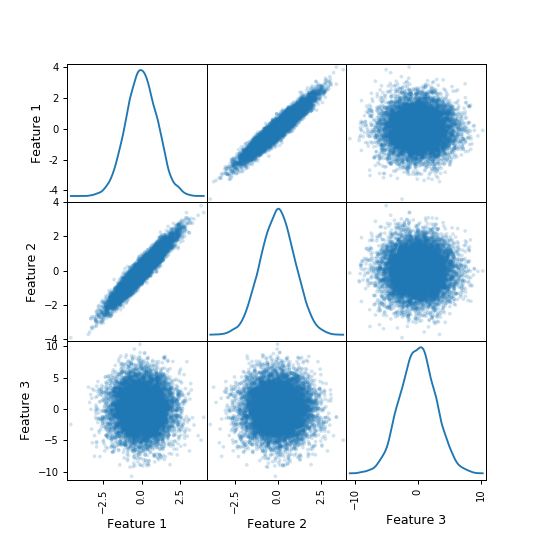

In [10]:
%matplotlib notebook
from pandas.plotting import scatter_matrix
df = pd.DataFrame(data, columns = ['Feature 1', 'Feature 2', 'Feature 3'])
p = scatter_matrix(df, alpha = 0.2, figsize = (6, 6), diagonal = 'kde')

We would like to reduce the dimensionality of the dataset from three to two features. As a first approach, we decide to manually drop the least informative feature.

---
[Back to top](#top)
<a id = "q4"></a>

### Question 4

In [11]:
### GRADED
###
### We aim to reduce the dimensionality of the dataset by dropping one of the features.
### During this process, we want to lose the minimum amount of information. 
###
### Which feature would you discard and why?
###
### a) Feature 1, because it provides no information.
### b) Feature 3, because it is independent of features 1 and 2.
### c) Feature 2, because it is correlated with feature 3.
### d) Feature 1, because it is correlated with feature 2.  ** You can see the correlation by how closely the plot fits to a line
### e) Feature 3, because it is correlated with features 1 and 2.

### Assign the correct answer in string format to ans1.

### YOUR ANSWER BELOW

ans1 = 'd'

###
### YOUR CODE HERE
###


In [12]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In a less brutal approach, we decide to collapse Features 1 and 2 into a single feature using vector projections. Again, we want to do so losing the minimum amount of information (variance). For this, we propose four different projection axes:

<IPython.core.display.Javascript object>


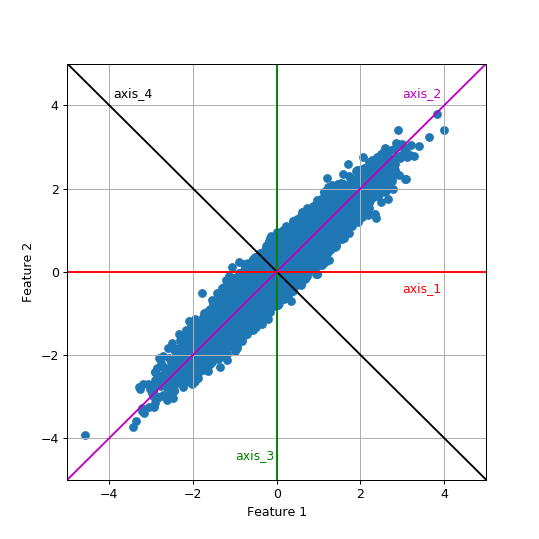

In [13]:
%matplotlib notebook
plt.figure(figsize=(6,6))
plt.axes(xlim = (-5,5), ylim = (-5,5), xlabel='Feature 1', ylabel='Feature 2')
plt.scatter(data[:,0], data[:,1])
plt.plot([-10,10],[0,0],'r-')
plt.plot([-10,10],[10,-10],'k-')
plt.plot([0,0],[-10,10],'g-')
plt.plot([-10,10],[-10,10],'m-')
plt.text(3,-.5,'axis_1',color='r')
plt.text(3,4.2,'axis_2',color='m')
plt.text(-1,-4.5,'axis_3',color='g')
plt.text(-3.9,4.2,'axis_4',color='k')
plt.grid()

---
[Back to top](#top)
<a id = "q5"></a>

In [15]:
a1 = np.array([1,0])
a2 = np.array([1,1])
a3 = np.array([0,1])
a4 = np.array([-1,1])

In [14]:
a2 = a2 / np.linalg.norm(a2)

# Compute the projections
data_a2 = np.dot(data[:,:2],a2)
print(np.var(data_a2))

NameError: name 'a2' is not defined

### Question 5
*Which axis, from the ones shown above, collapses Features 1 and 2 while preserving the maximum variance in the projected space?*

In [15]:
### GRADED
###
### Which axis collapses Features 1 and 2 while preserving the maximum variance
### in the projected space?
###
### Assign the axis name as a string to ans1. e.g.
### ans1 = 'axis_3'

### YOUR ANSWER BELOW
ans1 = 'axis_2'
### This is the "line of best fit" on the plot above
###
### YOUR CODE HERE
###


In [16]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### 1.3. Principal Component Analysis
The Principal Component Analysis (PCA) is a linear transformation used to reduce the dimensionality of the features of a dataset. Usually, the objective is to reduce the dimensionality to represent the data in 2D or 3D plots for quick exploration. 

The technique proceeds by projecting the data onto groups of features named *components*. These components represent a set of directions where the projected features are uncorrelated and have maximum variance. In other words, the projection of the data onto the components results in a set of uncorrelated features.

The PCA is an unsupervised algorithm because the transformation is applied directly on the feature space. The algorithm receives the samples and returns a set of axes (components), sorted by the variance that each component explains. The axis whose projection explains more variance is returned first and is named the **Principal Component**.

We will start by exploring the Covariance matrix of our dataset:

---
[Back to top](#top)
<a id = "q6.1"></a>

### Question 6.1
*Compute the covariance matrix of `data`.  To do so, use the numpy function [np.cov()](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.cov.html). Note: by default, `np.cov()` assumes that the variables are represented by the rows, but in our dataset the features are arranged as columns.*

In [17]:
### GRADED
###
### Compute the covariance matrix of the features in data.
### Assign the result as a np.array to 'cov_1'.
###
### Note: use the function np.cov().

cov_1 = np.cov(data.T)

print(cov_1)

###
### YOUR CODE HERE
###


[[ 1.00210577  0.95044461 -0.03119992]
 [ 0.95044461  0.9976996  -0.02444553]
 [-0.03119992 -0.02444553  7.84401534]]


In [18]:
np.corrcoef(data, rowvar=False)

array([[ 1.        ,  0.95053942, -0.01112826],
       [ 0.95053942,  1.        , -0.00873837],
       [-0.01112826, -0.00873837,  1.        ]])

In [19]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id = "q6.2"></a>
### Question 6.2
*Examine the covariance matrix and answer the following question:*

In [20]:
### GRADED
###
### From the covariance obtained in Question 6.1. Check all that apply:
### The chart above is viewed as Correlation, St DEV, Variance in that order
### a) The first and second features are strongly correlated. corr coef of (.9505) Yes, highly
### b) The second and third features are strongly correlated. corr coef of (-.02) No, not correlated
### c) The first and third features are not correlated. (-.03) Yes, uncorrelated
### d) The standard deviation of the third feature is close to 8. - not stdev, variance of 8
### e) The standard deviation of the first feature is close to 1. - stdev is .95 or ~1
### f) The variance of the third feature is close to 8. True (7.9)
### g) The variance of the second feature is close to 2. False (-.02)
###
### Provide all the correct options as a list of strings. Example: ans1 = ['a','c','g']

### YOUR ANSWER BELOW

ans1 = ['a','c','e','f']

###
### YOUR CODE HERE
###


In [21]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### PCA in sklearn
The library `sklearn` implements the PCA transformation in the module [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [22]:
from sklearn.decomposition import PCA

Data transformations, like Machine Learning models, have a common interface in `sklearn`. This is the usual procedure to apply a transformation in `sklearn`:
1. Instantiate the class PCA with the argument `n_components`, *i.e.* the desired number of principal components.
2. Apply the PCA transformation with the method `.fit_transform(X)`. The argument `X` must be a matrix or a pandas dataframe containing **only the features**.

⌨ **Example**: Below is an example of how to apply the PCA transform to a dataset:

##### Generate random dataset

In [23]:
# Generate an example dataset with 1000 samples and 5 features
np.random.seed(10)
cov_ = np.random.rand(5,5)
dataset_features = np.random.multivariate_normal(np.random.rand(5), np.dot(cov_, cov_.transpose()), size=1000)

##### Apply PCA transformation

In [24]:
# Instantiate the PCA transform and apply the transformation.
dataset_pca = PCA(n_components=2, random_state=10).fit_transform(dataset_features)

##### Covariance matrices

In [25]:
# Print the covariance matrices:
print('Original covariance:')
print(np.cov(dataset_features.transpose()))
print('\nCovariance after PCA:')
print(np.cov(dataset_pca.transpose()))

Original covariance:
[[1.78786901 0.80865935 1.33632502 1.71339119 1.3752497 ]
 [0.80865935 0.70224874 0.514788   0.71999225 0.57412287]
 [1.33632502 0.514788   2.2490987  2.12123251 1.20246318]
 [1.71339119 0.71999225 2.12123251 2.30384647 1.47087051]
 [1.3752497  0.57412287 1.20246318 1.47087051 1.09960621]]

Covariance after PCA:
[[6.87781488e+00 6.82803830e-16]
 [6.82803830e-16 9.24941267e-01]]


Carefully inspect the covariance matrices before and after the transformation. Note the following:
- PCA has effectively reduced the dimensionality of the features from 5 to 2.
- The resulting features are uncorrelated, *i.e.* all off-diagonal elements are very close to 0.
- The diagonal values correspond to the variance of the new components.

As expected, the first principal component is the one which explains more variance: `6.88`. The second principal component has a much smaller variance: `0.92`.

---
[Back to top](#top)
<a id = "q7.1"></a>

### Question 7.1
*Apply a PCA transformation to* `data` *to reduce the feature dimensionality to 2 compontents. Use the* `PCA` *class with* `random_state=10`

In [26]:
### GRADED
###
### Apply a PCA transformation to 'data'. Follow these steps:
### 1. Instantiate a PCA transform with 2 components and random_state=10, assign to 'pca_model'.
### 2. Fit the model and transform 'data', assign the transformed data to 'data_pca'.
### 
### Note: Fit and transform can be done in a single step using the method .fit_transform().
###

pca_model = PCA(n_components=2, random_state=10)
data_pca = pca_model.fit_transform(data)

###
### YOUR CODE HERE
###


In [27]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id = "q7.2"></a>
### Question 7.2
*Compute the covariance matrix after the transformation.*

In [28]:
### GRADED
###
### Compute the covariance matrix of 'data_pca'.
###
### Assign the resulting matrix to cov_2.
### 
### Note: use the function np.cov().

cov_2 = np.cov(data_pca.T)
print(data_pca)
print('-'*25)
print(cov_2)

###
### YOUR CODE HERE
###


[[ 6.57830189  0.83570796]
 [-2.05872176 -1.59024329]
 [-1.97363659  0.10959795]
 ...
 [-1.57710322  0.40056294]
 [-0.44143216 -2.42147465]
 [-1.17019687 -0.9825392 ]]
-------------------------
[[7.84428096e+00 1.07444806e-15]
 [1.07444806e-15 1.95008710e+00]]


In [29]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id = "q7.3"></a>
### Question 7.3
*Compare the covariance matrix before and after the transformation and answer the question:*

In [30]:
print('Covariance before PCA (Features):')
print(cov_1[:,:])
print('\nCovariance after PCA (Components):')
print(cov_2[:,:])

Covariance before PCA (Features):
[[ 1.00210577  0.95044461 -0.03119992]
 [ 0.95044461  0.9976996  -0.02444553]
 [-0.03119992 -0.02444553  7.84401534]]

Covariance after PCA (Components):
[[7.84428096e+00 1.07444806e-15]
 [1.07444806e-15 1.95008710e+00]]


In [31]:
### GRADED
###
### Given the covariance matrices before and after the PCA. Check all that apply:
###
### a) The variance of the first Principal Component is 1. (7.8)
### b) All the features before the PCA are uncorrelated. (both corr and uncorr)
### c) All the features after the PCA are uncorrelated. (yes, always uncoor. that's the purpose)
### d) All the features before the PCA are correlated. (both)
### e) All the features after the PCA are correlated.(the point is to create uncorr'd components out of the features)
### f) The second Principal Component has less variance than the first Feature.  (1.95 v 1) false
### g) The second Principal Component has greater variance than the second Feature. (1.95 v .99) true
### h) The first Principal Component has approximately the same variance as the third Feature. (7.8 v 7.8) true
###
### Provide all the correct options as a list of strings. Example: ans1 = ['a','c','g']

### YOUR ANSWER BELOW

ans1 = ['c','g','h']

###
### YOUR CODE HERE
###


In [32]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


The computed components can be obtained from the `PCA` attribute `PCA.components_`:

In [33]:
display(pd.DataFrame(abs(pca_model.components_), index=['First PC', 'Second PC'], columns=['Feature 1', 'Feature 2', 'Feature 3']))

,Feature 1,Feature 2,Feature 3
First PC,0.005155,0.004286,0.999978
Second PC,0.707898,0.706283,0.006677


Each row is a Principal Component (sorted by order of explained variance). The columns can be understood as the relative contribution of each Feature to the component. For example, we see that the contribution of `Feature 1` to the second Principal Component is about `0.71`.

<a id = "q7.4"></a>
### Question 7.4

In [34]:
### GRADED
###
### Given the PCA components above. Check all that apply:
###
### a) Features 1 and 2 have a relevant contribution to the first Principal Component. fasle
### b) Most of the information of the first Principal Component is taken from Feature 3.true
### c) Feature 1 contributes substantially more to the second Principal Component than Feature 2. false
### d) The contribution of Features 1 and 2 to the second Principal Component is almost equal. x
### e) The PCA has combined the correlated Features 1 and 2 onto a single uncorrelated feature. x?
### f) The maximum variance of 'data' lies in the direction of Feature 3. x
###
### Provide all the correct options as a list of strings. Example: ans1 = ['a','c','g']

### YOUR ANSWER BELOW

ans1 = ['b','d','e','f']

###
### YOUR CODE HERE
###


In [35]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### 1.4 Data scaling
In the previous section we performed a PCA transformation on `data` and the first component coincided exactly with the direction of the third feature. This could have been predicted in advance, since the third feature has a much wider range of values compared to the first and second features.

Observe the differences in scaling in the histograms below:

<IPython.core.display.Javascript object>


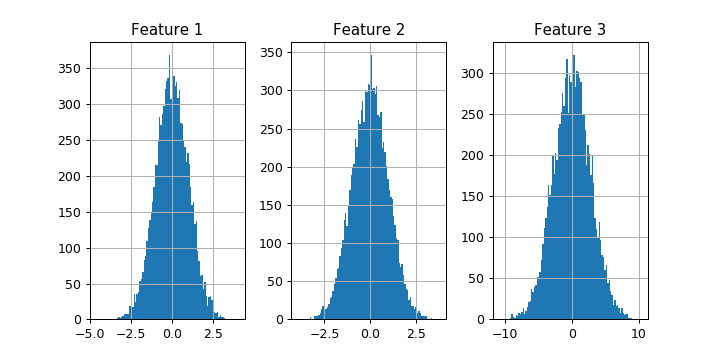

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5846ba46d8>,
      dtype=object)

In [36]:
pd.DataFrame(data, columns=['Feature 1', 'Feature 2', 'Feature 3']).hist(layout=(1,3), figsize=(8,4), bins=100)

Note that the range of values for both features 1 and 2 lie within -4 and 4. However, feature 3 ranges from -10 to 10. Since a wider range usually implies a greater variance, feature 3 is much more likely to be selected as the first component.

In general, when the PCA to selects single features as its components we do not gain any information on how the features are related to each other. Instead, it is rather more desirable to project highly correlated groups features together so as to eliminate redundant information.

A simple way to mitigate this problem is to **individually scale all the features so that they have the same variance**. Doing so will force the algorithm to find the Principal Components using combinations of correlated features, rather than just placing the principal components over the features with largest variance.

---
[Back to top](#top)
<a id = "q8.1"></a>

### Question 8.1
*Scale the features in* `data` *so that the variance of each column is equal to `1.0`. Use one of the following:*
- [np.var()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.var.html)
- [np.std()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html)

In [37]:
### GRADED
###
### Scale the columns of the dataset 'data' so that the resulting variance of each column is 1.0.
### Assign the result of scaling to 'data_scaled'.
### 
### Note: You can use np.std() or np.var() to compute the standard deviation or the variance, respectively.

### YOUR ANSWER BELOW

data_scaled = data/data.std(axis = 0)
print(data_scaled)

###
### YOUR CODE HERE
###

### Answer checks
print("Variance of 'data': {}".format(data.var(axis=0)))
print("Variance of 'data_scaled': {}".format(data_scaled.var(axis=0)))

[[-0.88986381 -0.23984135 -2.33864269]
 [ 1.04852875  1.17009237  0.75116954]
 [ 0.04227006 -0.22784814  0.71679646]
 ...
 [-0.28159302 -0.31121795  0.57447918]
 [ 1.65233358  1.75715067  0.1756821 ]
 [ 0.67079285  0.6965143   0.4324775 ]]
Variance of 'data': [1.00200556 0.99759983 7.84323094]
Variance of 'data_scaled': [1. 1. 1.]


In [38]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id = "q8.2"></a>
### Question 8.2
*Compute the Principal Components of* `data_scaled` *with* `n_components=3` *and* `random_state=10`. *Assign the projected data to* `pca_scaled` *and the components to* `components_scaled`.

In [39]:
### GRADED
###
### Compute the Principal Components of 'data_scaled' using 'n_components=3' and 'random_state=10'.
### Assign the PCA projections of 'data_scaled' to 'pca_scaled'.
### Assign the components used for the projection to 'components_scaled'.
###

### YOUR ANSWER BELOW

pca = PCA(n_components=3, random_state=10)
pca_scaled = pca.fit_transform(data_scaled)
components_scaled = pca.components_

###
### YOUR CODE HERE
###

### Answer checks
print("Dimensions of projected data: {}".format(pca_scaled.shape[1]))
print("\nPCA Components:\nFirst Component  {}\nSecond Component {}\nThird Component  {}".format(components_scaled[0], components_scaled[1], components_scaled[2]))

Dimensions of projected data: 3

PCA Components:
First Component  [-0.70703889 -0.70702032  0.01477398]
Second Component [-0.00918953 -0.01170404 -0.99988928]
Third Component  [-0.70711495  0.70709637 -0.00177803]


In [40]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id = "q8.3"></a>
### Question 8.3
*Compute the covariance matrices of* `data_scaled` *and* `pca_scaled`. *Assign the result to* `cov_scaled_raw` *and* `cov_scaled_pca`, *respectively.*

In [41]:
### GRADED
###
### Compute the covariance matrix of 'data_scaled', assign the result to 'cov_scaled_raw'.
### Compute the covariance matrix of 'pca_scaled', assign the result to 'cov_scaled_pca'.
###

### YOUR ANSWER BELOW

cov_scaled_raw = np.cov(data_scaled.T)
cov_scaled_pca = np.cov(pca_scaled.T)

###
### YOUR CODE HERE
###

### Answer checks
print("Covariance matrix before PCA:")
print(cov_scaled_raw[:,:])
print("\nCovariance matrix after PCA:")
print(cov_scaled_pca[:,:])

Covariance matrix before PCA:
[[ 1.00010001  0.95063449 -0.01112938]
 [ 0.95063449  1.00010001 -0.00873924]
 [-0.01112938 -0.00873924  1.00010001]]

Covariance matrix after PCA:
[[ 1.95094208e+00 -3.05563933e-17  7.63909832e-17]
 [-3.05563933e-17  9.99895429e-01  9.17135932e-18]
 [ 7.63909832e-17  9.17135932e-18  4.94625194e-02]]


In [42]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id = "q8.4"></a>
### Question 8.4
*Given the components obtained in `Question 8.2` and the covariance matrices obtained in `Question 8.3`, check all that apply:*

In [43]:
print("Components of scaled data:")
display(pd.DataFrame(components_scaled, index=['First PC', 'Second PC', 'Third PC'], columns=['Feature 1', 'Feature 2', 'Feature 3']))
print("\nCovariance matrix of scaled data:\n")
print(cov_scaled_pca[:,:])

Components of scaled data:


,Feature 1,Feature 2,Feature 3
First PC,-0.707039,-0.707020,0.014774
Second PC,-0.009190,-0.011704,-0.999889
Third PC,-0.707115,0.707096,-0.001778



Covariance matrix of scaled data:

[[ 1.95094208e+00 -3.05563933e-17  7.63909832e-17]
 [-3.05563933e-17  9.99895429e-01  9.17135932e-18]
 [ 7.63909832e-17  9.17135932e-18  4.94625194e-02]]


In [44]:
np.corrcoef(data_scaled, rowvar=False)

array([[ 1.        ,  0.95053942, -0.01112826],
       [ 0.95053942,  1.        , -0.00873837],
       [-0.01112826, -0.00873837,  1.        ]])

In [45]:
### GRADED
###
### Given the scaled components obtained in Question 8.2 and the covariance
### matrices obtained in Question 8.3, Check all that apply:
###
### NOTE: The maximum contribution of a Feature to a component is 1.0 or -1.0.
###       A negative sign is also considered a contribution in the feature direction.
###
### a) Scaling did not produce any effect in the process of component selection. F
### b) The first component has the direction of the third feature. T?
### c) The second component has the direction of the third feature. T?
### d) The first component captures the correlation between the first and second feature.T
### e) Most of the variance is explained by the third component.F
### f) The third component contains almost no information. T?
### g) The PCA components of scaled data are uncorrelated but components of raw data are not.F
###
### Provide all the correct options as a list of strings. Example: ans1 = ['a','c','g']

### YOUR ANSWER BELOW

ans1 = ['c','d','f']

###
### YOUR CODE HERE
###


In [46]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


____
<a id="part2"></a>
## Part 2. Effect of drug treatments on human cells

In the second part of the assignment we will put in practice several Dimensionality Reduction techniques to analyze the effect of drug treatments on human cells.

This exercise is based on a dataset that contains measurements of gene expression levels made on a few hundred cells. Two groups of cells were treated using two different drugs, a third group was left untreated to have a baseline reference of normal gene expression. 

Our goal is to determine whether these treatments produce a detectable effect on gene expression or not.

#### Dataset

In [47]:
cell_data = pd.read_csv('data/cell_treatment.csv', index_col=0, header=0)

The columns of the DataFrame `cell_data` are the names of the 500 measured genes and the rows the treated cells. The column names have a common format `ENSG` followed by a number. This is a [unique identifier](https://www.ensembl.org/info/genome/genebuild/genome_annotation.html) assigned to genes as they are discovered:

In [48]:
cell_data.head()

,ENSG00000143851.15,ENSG00000142669.14,ENSG00000196839.12,ENSG00000274752.1,ENSG00000276849.6,ENSG00000281981.2,ENSG00000188229.5,ENSG00000132507.17,ENSG00000110321.16,ENSG00000015475.18,...,ENSG00000152910.18,ENSG00000223418.1,ENSG00000160963.13,ENSG00000229413.2,ENSG00000163138.18,ENSG00000188984.11,ENSG00000226658.1,ENSG00000182521.5,ENSG00000284949.1,label
cell_1,192.000,285.99,2501.0,299.0,41.701,687.448,311.00,411.990,721.001,105.999,...,0.0,0.0,0.0,0.0,41.000,0.0,0.0,0.0,0.0,Untreated
cell_2,204.001,191.00,4240.0,200.0,151.132,717.663,264.00,1045.150,534.000,195.000,...,0.0,0.0,0.0,0.0,17.001,0.0,0.0,0.0,0.0,Untreated
cell_3,63.999,310.00,2106.0,198.0,15.257,527.261,66.00,914.999,539.999,59.000,...,0.0,0.0,0.0,0.0,51.000,0.0,0.0,0.0,0.0,Untreated
cell_4,51.000,155.00,339.0,3.0,1.014,20.334,1450.71,352.000,477.000,54.000,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,Treatment_A
cell_5,0.000,250.00,174.0,0.0,0.000,0.000,2633.00,565.231,647.000,22.000,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,Treatment_A


You may have quickly realized that our dataset has more features than samples: 480 cells vs 500 genes.

In [49]:
cell_data.shape

(480, 501)

The last column has information about the treatment:

In [50]:
cell_data['label'].head()

cell_1      Untreated
cell_2      Untreated
cell_3      Untreated
cell_4    Treatment_A
cell_5    Treatment_A
Name: label, dtype: object

There are three different labels: `Untreated`, `Treatment_A` and `Treatment_B`.

In [51]:
cell_data['label'].unique()

array(['Untreated', 'Treatment_A', 'Treatment_B'], dtype=object)

Our plan is to visually determine whether the treatment produced a notable change in gene expression. However, the excessive amount of features is an impediment for visualization, since data can be visualized only on 3 dimensions or less. Before visualizing the samples, we need to reduce the dimensionality of the datased.

### 2.1. Dropping uninformative features

Not all the genes in human cells are being used all the time. About 40% of them are switched off when the cell does not need them. For this reason, we expect that some genes will not have detectable gene expression and their measurements in all cells will be 0. We will start by removing these uninformative columns.

To select the columns based on a condition we can directly use boolean operators. In our case we are interested in removing the columns where all elements are equal to 0. A first approach is to use a direct comparison like: 

In [52]:
cell_data == 0

,ENSG00000143851.15,ENSG00000142669.14,ENSG00000196839.12,ENSG00000274752.1,ENSG00000276849.6,ENSG00000281981.2,ENSG00000188229.5,ENSG00000132507.17,ENSG00000110321.16,ENSG00000015475.18,...,ENSG00000152910.18,ENSG00000223418.1,ENSG00000160963.13,ENSG00000229413.2,ENSG00000163138.18,ENSG00000188984.11,ENSG00000226658.1,ENSG00000182521.5,ENSG00000284949.1,label
cell_1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,True,False
cell_2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,True,False
cell_3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,True,False
cell_4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
cell_5,True,False,False,True,True,True,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
cell_6,True,True,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
cell_7,True,False,False,True,True,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
cell_8,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
cell_9,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,True,False
cell_10,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,True,False


But this will return a boolean value for each element in the DataFrame. The Pandas [`DataFrame.all()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.all.html) and [`DataFrame.any()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html) functions return `True` if all the elements in a column (default) are `True` (`.all()`) or if at least one element is `True` (`.any()`). We can use `.any()` to select these columns where at least one row is greater than 0, as follows:

In [53]:
(cell_data != 0).any()

ENSG00000143851.15     True
ENSG00000142669.14     True
ENSG00000196839.12     True
ENSG00000274752.1      True
ENSG00000276849.6      True
ENSG00000281981.2      True
ENSG00000188229.5      True
ENSG00000132507.17     True
ENSG00000110321.16     True
ENSG00000015475.18     True
ENSG00000081237.19     True
ENSG00000048740.18     True
ENSG00000108561.8      True
ENSG00000167286.9      True
ENSG00000184900.15     True
ENSG00000108518.7      True
ENSG00000132475.10     True
ENSG00000217555.12     True
ENSG00000110031.12     True
ENSG00000085117.11     True
ENSG00000198818.9      True
ENSG00000075624.14     True
ENSG00000074800.15     True
ENSG00000180096.11     True
ENSG00000160888.6      True
ENSG00000205220.11     True
ENSG00000143653.9      True
ENSG00000093010.13     True
ENSG00000182866.16     True
ENSG00000110876.9      True
                      ...  
ENSG00000105419.17     True
ENSG00000268879.1     False
ENSG00000152223.13     True
ENSG00000115128.6      True
ENSG00000271741.1   

This returns a `pd.Series` with the gene names and `True` or `False` depending on whether the gene has detectable expression or not.

---
[Back to top](#top)
<a id = "q9"></a>

### Question 9
*Use the* [`.loc[]`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) *accessor and the boolean series above to drop the columns whose elements are all 0. Assing the resulting data frame after dropping all silent genes to* `cell_data_nz`.

In [54]:
### GRADED
### Use the .loc accessor and the following boolean Series:
###
### (cell_data != 0).any()
###
### To select the non-zero columns from cell_data, assign the result to 'cell_data_nz'.

### YOUR ANSWER BELOW

a = (cell_data != 0).any()

cell_data_nz = cell_data.loc[:,a]
###
### YOUR CODE HERE
###


In [55]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### 2.2. Feature correlation map

A valuable tool to learn more about the features of our dataset are correlation heatmaps. In a correlation map, the degree of correlation between all feature pairs is shown using a color code: blue for positive correlation, red for negative correlation and white for no correlation.

Correlation heatmaps can be created easily by first computing the correlation matrix with [`pandas.DataFrame.corr()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) and then using the [`seaborn.clustermap()`](https://seaborn.pydata.org/generated/seaborn.clustermap.html) method to create a clustered heatmap.

<IPython.core.display.Javascript object>


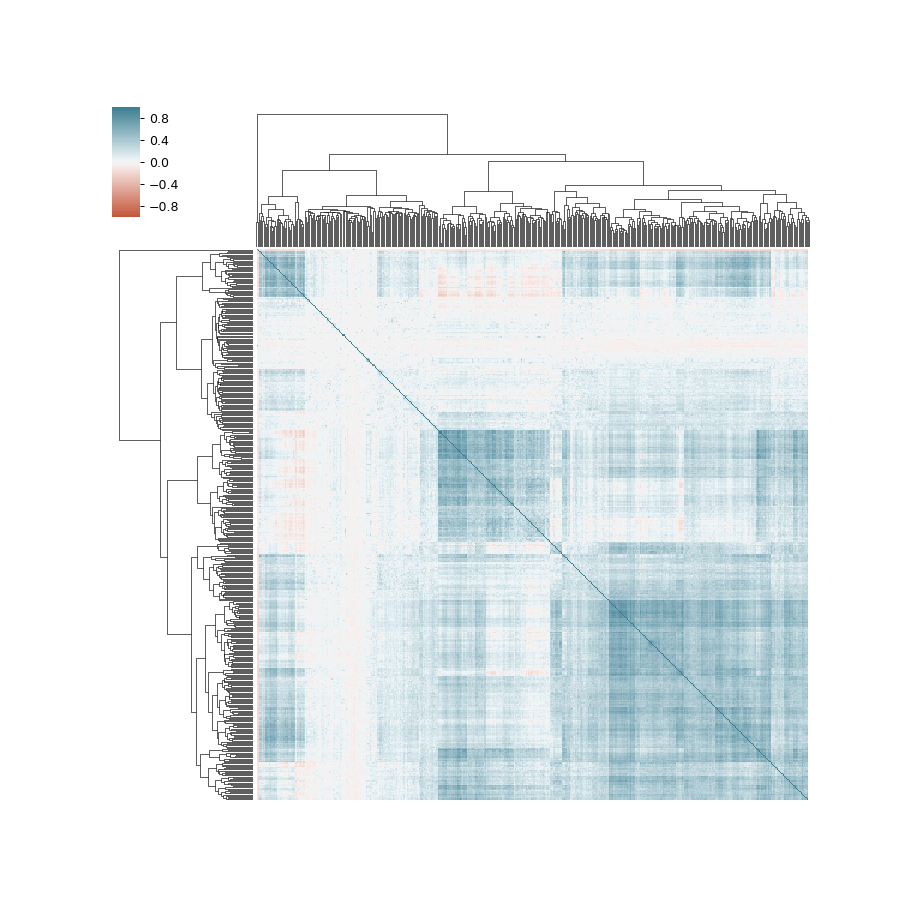

In [56]:
%matplotlib notebook
corr = cell_data_nz.corr()
ax = sns.clustermap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    yticklabels=False,
    xticklabels=False
)

From this heatmap we learn that big clusters of genes have strong correlation among them. Besides, some of these gene clusters show negative correlation among them (see the red areas a the center top of the map), meaning that when a cluster of genes is expressed, the other is switched off.

Overall, there is strong correlation between features. In such cases, the use of a dimensionality reduction algorithm is a good idea not only for visualization, but also to decorrelate the features before processing the data.

### 2.3. Principal Component Analysis
Now it's your turn to use the PCA to reduce the dimensionality of the dataset. You will follow the steps below:
1. Normalize the gene expression per cell.
2. Normalize the standard deviation of the features.
3. Reduce the dimensionality with PCA to 2 components.
4. Visualize samples in scatterplot.

Before pre-processing our data, let's separate the features from the labels:

In [57]:
X = cell_data_nz.iloc[:,:-1]
y = cell_data_nz['label']

#### 1. Normalize cell counts

A representative of the laboratory that took care of the experiments told us that the expression measurements are not balanced.

This means that the total sum of expression counts per cell may be orders of magnitude different in different samples due to limitations of the measurement technology. As a consequence, the absolute expression counts cannot be compared directly among samples, but the same representative told us that is safe to compare samples using the relative gene expression.

_The following example illustrates this issue:_

Cells 1 and 2 are known to have a very similar expression profile. However, after measuring their gene expression on genes A and B, we obtain the following expression counts:

In [58]:
display(pd.DataFrame({'gene A': [10,200], 'gene B': [90,1800]}, index=['cell 1', 'cell 2']))

,gene A,gene B
cell 1,10,90
cell 2,200,1800


The absolute expression counts of cells 1 and 2 are different, but their relative expression profile is exactly the same:

In [59]:
display(pd.DataFrame({'gene A (%)': [10,10], 'gene B (%)': [90,90]}, index=['cell 1', 'cell 2']))

,gene A (%),gene B (%)
cell 1,10,90
cell 2,10,90


---
[Back to top](#top)
<a id = "q10"></a>

### Question 10
*Convert the absolute gene expression of each sample into relative gene expression. Do so by dividing each row of* `X` *by its sum. All rows must sum to 1 after this normalization.*

In [60]:
### GRADED
###
### Divide each row of X by its sum, assign the result to 'X_rel'.
###

### YOUR ANSWER BELOW
X_rel = ((X.T)/(X.sum(1))).T
###
### YOUR CODE HERE
###
### Answer checks
print("Sum of first 5 rows of X_rel:")
display(X_rel.sum(1).head())

Sum of first 5 rows of X_rel:


cell_1    1.0
cell_2    1.0
cell_3    1.0
cell_4    1.0
cell_5    1.0
dtype: float64

In [76]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### 2. Normalize standard deviation of the features

As exposed in Section [1.4. Data Scaling](#1.4-Data-scaling), it is very important to normalize the features so that they all have the same variance.

---
[Back to top](#top)
<a id = "q11"></a>

### Question 11
*Scale the columns of* `X_rel` *so that the resulting variance of each column is 1.0. Assign the result to* `X_scaled`. *Suggested methods:*

- [pd.DataFrame.std()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html)

In [62]:
### GRADED
###
### Scale the columns of 'X_rel' so that the resulting variance of each column is 1.0.
### Assign the result of scaling to 'X_scaled'.
###

### YOUR ANSWER BELOW

X_scaled = X_rel/X_rel.std(0)

###
### YOUR CODE HERE
###

### Answer checks
print("Variance of first 5 columns of X_norm:")
display(X_scaled.std(0).head())

Variance of first 5 columns of X_norm:


ENSG00000143851.15    1.0
ENSG00000142669.14    1.0
ENSG00000196839.12    1.0
ENSG00000274752.1     1.0
ENSG00000276849.6     1.0
dtype: float64

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### 3. Reduce the dimensionality to 2 components

---
[Back to top](#top)
<a id = "q12"></a>

### Question 12
*Compute the PCA of* `X_scaled` *with *`n_components=2` *and* `random_state=10`. *Assign the transformed sample to* `X_pca`.


In [63]:
### GRADED
###
### Compute the PCA of X_scaled with n_components=2 and random_state=10.
### Assign the transformed sample to 'X_pca'.
###

### YOUR ANSWER BELOW

X_pca = PCA(n_components=2, random_state=10).fit_transform(X_scaled)

###
### YOUR CODE HERE
###
### Answer checks
print("Number of features of X_pca: {}".format(X_pca.shape[1]))

Number of features of X_pca: 2


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### 4. Visualize samples in scatterplot

Select rows based on their label:

In [64]:
untreated_rows = y == 'Untreated'
treatment_a_rows = y == 'Treatment_A'
treatment_b_rows = y == 'Treatment_B'

Plot 3 scatterplots, one per treatment. Each plot will show with a different color:

<IPython.core.display.Javascript object>


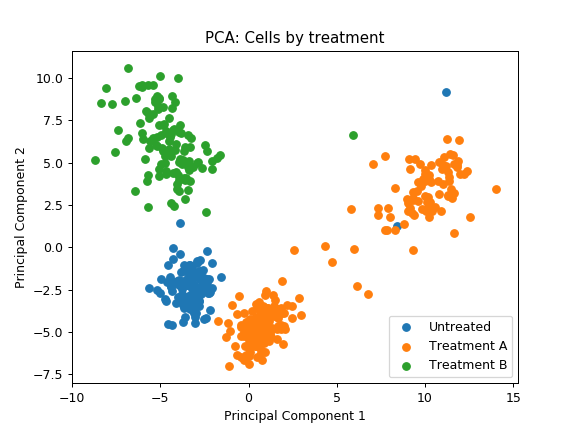

In [65]:
%matplotlib notebook
plt.scatter(X_pca[untreated_rows,0], X_pca[untreated_rows,1])
plt.scatter(X_pca[treatment_a_rows,0], X_pca[treatment_a_rows,1])
plt.scatter(X_pca[treatment_b_rows,0], X_pca[treatment_b_rows,1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Cells by treatment')
plt.legend(['Untreated', 'Treatment A', 'Treatment B'])
plt.show()

---
[Back to top](#top)
<a id = "q13"></a>

### Question 13
*Examine the scatterplot above and answer the following question:*

In [67]:
### GRADED
###
### Check all that apply:
###
### a) The Untreated group is the most heterogeneous. plot is all over the place "hetro" ### means data points are not clustered
### b) Treatment A has no effect on gene expression (compared to untreated). ### overlapped and clustered
### c) Treatment B has no effect on gene expression (compared to untreated). ### overlapped and clustered
### d) Treatment A seems to affect the cells in two different ways. ### 2 separate clusters, 2 affects
###
### With the expression measurements of these 500 target genes...
### e) ...we cannot clearly distinguish whether the cells have been treated or not. ### everything looks mixed
### f) ...we can distinguish whether the cells have been treated but not which treatment.### treatment data points are mixed tog
### g) ...we can clearly identify which treatment has been applied. ### clearly clustered groups, unmixed data points
###
### Provide all the correct options as a list of strings. Example: ans1 = ['a','c','g']

### YOUR ANSWER BELOW
ans_1 = ['d','g']

###
### YOUR CODE HERE
###


In [68]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### 2.5. Interpretation of the results

After the dimensionality reduction and visualization, we got a striking result. We expected to see, at most, three clearly distinguished profiles: Untreated and Treatments A and B. However, our results show that there are four different expression profiles.

After talking again to the lab representative, we get to know that this technology is not able to filter out the dead cells from the sample. The representative tells us that dead cells have a characteristic expression profile:
- The expression profile is clearly different compared to normal expression.
- Their absolute expression counts is significantly smaller than average.

We proceed to investigate if any of the expression profiles has significantly reduced absolute expression measurements. We can do so by reproducing the same scatterplot as before, but this time the color scale will represent the total expression count per sample.

In [69]:
total_expression = X.sum(1)
total_expression.head()

cell_1     83246.040
cell_2    106118.420
cell_3     88566.068
cell_4     55873.552
cell_5     55853.509
dtype: float64

Plot the same components with and set the sample color to `total_expression` with a white-red color map:

<IPython.core.display.Javascript object>


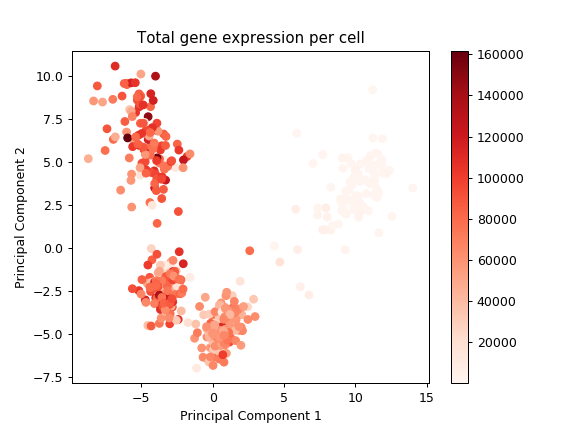

In [70]:
%matplotlib notebook
plt.scatter(X_pca[:,0], X_pca[:,1], c=total_expression, cmap=plt.cm.Reds)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Total gene expression per cell')
plt.colorbar()
plt.show()

Note that one of the groups has almost disappeared.

---
[Back to top](#top)
<a id = "q14"></a>

### Question 14
*Use the two previous scatterplots (label and total expression) to answer the following question:*

In [71]:
### GRADED
###
### Check all that apply:
### Dead cells are more faded in the plot, 
### a) The cell cluster at the bottom center of the PC plot corresponds to dead cells. 
### b) The cell cluster at the center right of the PC plot corresponds to dead cells.x
### c) Almost all the cells treated with drug A are alive. which is more faded
### d) Almost all the cells treated with drug B are alive. A or B
### e) Almost all the untreated cells are dead.
### f) Most of the dead cells were treated with drug A.t?
### g) We can conclude that treatment A is less toxic than treatment B.
### h) We can conclude that treatment B is less toxic than treatment A.
### i) We cannot draw any conclusions about drug toxicity from this analysis. 
###
### Provide all the correct options as a list of strings. Example: ans1 = ['a','c','g']

### YOUR ANSWER BELOW

ans_1 = ['b','d','f','h']

###
### YOUR CODE HERE
###


In [72]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Removing dead cells.
We can remove the dead cells from the analysis by filtering directly on their PCA components. After a quick inspection of the previous scatterplot, we realize that one principal component represents some sort of dead/alive signature.

---
[Back to top](#top)
<a id = "q15"></a>

### Question 15
*Note that the cells are dead on one extreme and alive in the other, with a clear threshold in the middle. We propose to remove the dead cells from the dataset by thresholding on one of the principal components, what is the proper filter we shoud apply?*

In [76]:
### GRADED
###
### What filter should we apply to cell_norm to remove the dead cells from the dataset?
###
### Select the axis to filter from:
### 0 for Principal Component 1
### 1 for Principal Component 2
###
### Assign an integer to 'filter_axis'.
###
### Assign the threshold value as a float to 'filter_thr'.
###
### Example: To threshold the Principal Component 2 at 6.0, set:
### filter_axis = 1
### filter_thr  = 6.0
###
### NOTE: The threshold value is approximate, asnwers within +/-1 deviation from the optimal
###       threshold will be accepted.

### YOUR ANSWER BELOW

filter_axis = 0
filter_thr = 5.0 or 3.0

###
### YOUR CODE HERE
###


In [77]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Now let's remove the dead cells from the analysis and redo the PCA:

In [78]:
X_alive = X_scaled.loc[X_pca[:,filter_axis] < filter_thr,:]
y_alive = y.loc[X_pca[:,filter_axis] < filter_thr]

In [79]:
untreated_alive = y_alive == 'Untreated'
treatment_a_alive = y_alive == 'Treatment_A'
treatment_b_alive = y_alive == 'Treatment_B'

In [80]:
X_pca_alive = PCA(n_components=2).fit_transform(X_alive)

<IPython.core.display.Javascript object>


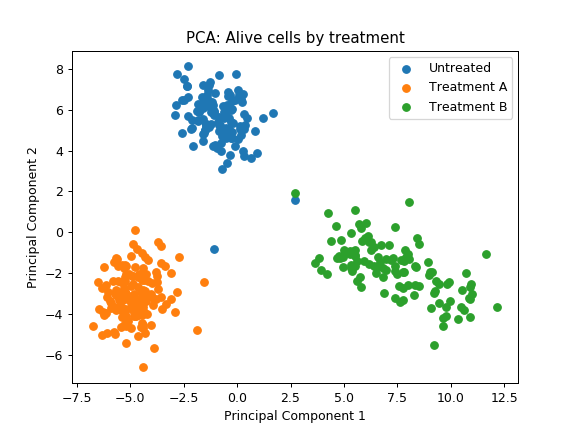

In [81]:
%matplotlib notebook
plt.scatter(X_pca_alive[untreated_alive,0], X_pca_alive[untreated_alive,1])
plt.scatter(X_pca_alive[treatment_a_alive,0], X_pca_alive[treatment_a_alive,1])
plt.scatter(X_pca_alive[treatment_b_alive,0], X_pca_alive[treatment_b_alive,1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Alive cells by treatment')
plt.legend(['Untreated', 'Treatment A', 'Treatment B'])
plt.show()

---
[Back to top](#top)
<a id = "q16"></a>

## Question 16
*Check the final Principal Component projection and answer the question:*

In [82]:
### GRADED
###
### After a quick inspection of our dataset using Dimensionality Reduction, check all that apply:
###
### a) PCA is supervised and is not able to separate well the different treatments.
### b) PCA is supervised and is able to separate well the different treatments.
### c) PCA is unsupervised and is not able to separate well the different treatments.
### d) PCA is unsupervised and is able to separate well the different treatments. x
### e) Unsupervised clustering (like k-Means) on X_pca_alive would produce good results.x
### f) Unsupervised clustering (like k-Means) on X_pca_alive would not produce good results.
### g) We cannot use unsupervised clustering on X_pca_alive because it has only 2 dimensions. f
###
### Provide all the correct options as a list of strings. Example: ans1 = ['a','c','g']

### YOUR ANSWER BELOW

ans_1 = ['d','e']

###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### 2.6. Linear Discriminant Analysis

A more appropriate technique for visualization and classification when the sample labels are available are the Linear Discriminants. This technique, unlike the PCA, has information about the class of the sample and can exploit it to find a projection that maximizes the distances between different classes and simultaneously minimizes the cluster spatial extent of each class.

In [83]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In `sklearn`, the LDA transform has a similar interface to the PCA. Use the [`LinearDiscriminantAnalysis`](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) class to reduce the dimensionality of `X_alive` to 2.

---
[Back to top](#top)
<a id = "q17"></a>

### Question 17
*Instantiate a* `LinearDiscriminantAnalysis`* class with* `n_components=2`. *Use the method* `.fit_transofm(X, y)` *to apply a LDA transformation to *`X_alive`,* store the result in *`X_alive_lda`.

In [84]:
### GRADED
###
### Instantiate a LinearDiscriminantAnalysis with n_components=2.
### Fit the discriminant using .fit_transform() with 'X_alive' and 'y_alive'.
### Store the result in 'X_alive_lda'.
###

### YOUR ANSWER BELOW

X_alive_lda = LinearDiscriminantAnalysis(n_components=2).fit_transform(X_alive, y_alive)

###
### YOUR CODE HERE
###


/usr/local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [85]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<IPython.core.display.Javascript object>


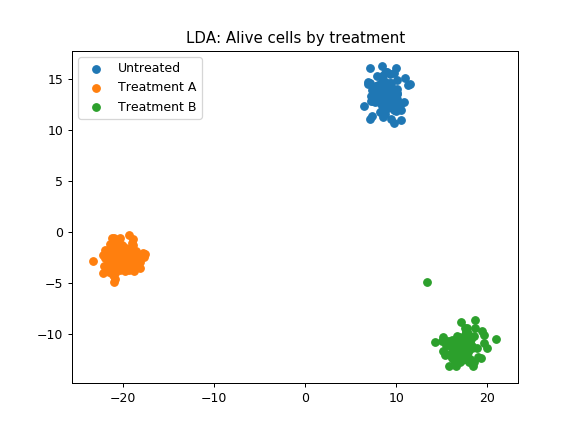

In [86]:
%matplotlib notebook
plt.scatter(X_alive_lda[untreated_alive,0], X_alive_lda[untreated_alive,1])
plt.scatter(X_alive_lda[treatment_a_alive,0], X_alive_lda[treatment_a_alive,1])
plt.scatter(X_alive_lda[treatment_b_alive,0], X_alive_lda[treatment_b_alive,1])
plt.title('LDA: Alive cells by treatment')
plt.legend(['Untreated', 'Treatment A', 'Treatment B'])
plt.show()

---
[Back to top](#top)
<a id = "q18"></a>

## Question 18
*LDA produces a quite different projection on the data compared to PCA. Compare the projections made by PCA and LDA and answer the following question:*

In [89]:
### GRADED
###
### Compare the projections made by PCA and LDA. Check all that apply:
###
### a) The PCA projection would have better clustering score with k-Means. ### PCA clustered better? No
### b) The LDA projection would have better clustering score with k-Means. ### LDA clusterd better? Yes
### c) The ratio [intra-class variance]/[inter-class variance] is greater in PCA. ### PCA had wider variance    10/100
### d) The ratio [intra-class variance]/[inter-class variance] is greater in LDA. ### LDA variance was tighter  1/200
### e) LDA produced a better projection because it used label information.x
### f) PCA produced a projection based on the directions of maximum variance.
### g) The projections of PCA do not take into account the separation of classes.
###
###
### Provide all the correct options as a list of strings. Example: ans1 = ['a','c','g']

### YOUR ANSWER BELOW

ans_1 = ['b','c','e','f','g']

###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###
